## Setting Global Variables

In [9]:
import os

device = 'cuda:0'
image_size = 128
root_dir = "data/AccidentDataset"
image_dim = (image_size, image_size)
image_dir = 'images'
annotation_dir = 'labels'
base_checkpoint_dir  = "model_checkpoints"

## CCTV Frame Accident Classification

### Load Train, Validation and Test Dataset

In [2]:
import os
from time import gmtime, strftime
from dataset.dataset import AccidentDataset
from utils.funcs import ComposeTransform

transform = ComposeTransform()

train_dataset = AccidentDataset(root_dir=root_dir, image_dir=image_dir, annotation_dir=annotation_dir, image_size=image_dim, transform=transform, split='train')
val_dataset = AccidentDataset(root_dir=root_dir, image_dir=image_dir, annotation_dir=annotation_dir, image_size=image_dim, transform=transform, split='val')
test_dataset = AccidentDataset(root_dir=root_dir, image_dir=image_dir, annotation_dir=annotation_dir, image_size=image_dim, transform=transform, split='test')

print(f"Number of Training Data: {len(train_dataset)}")
print(f"Number of Validation Data: {len(val_dataset)}")
print(f"Number of Test Data: {len(test_dataset)}")

Number of Training Data: 774
Number of Validation Data: 97
Number of Test Data: 100


### Plotting Samples

Accident: 0


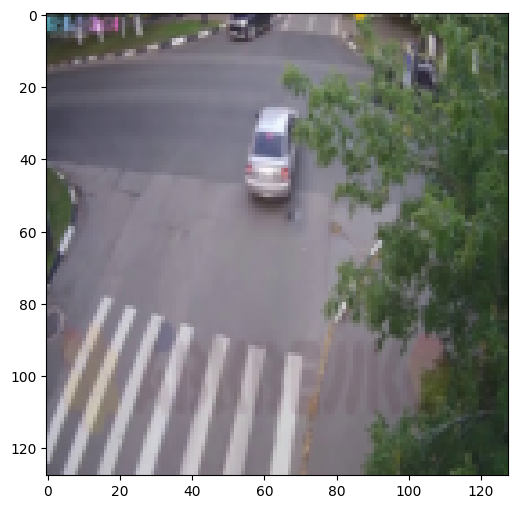

In [3]:
from utils.visualization import VisualizeAccident
VisualizeAccident(train_dataset, random_seed=50)

### Data Loader

In [4]:
from torch.utils.data import DataLoader
from utils.funcs import collate_fn_binary

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn_binary)
val_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn_binary)
test_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn_binary)

### Loading Classification Model

In [6]:
import torch.nn as nn
import torchvision.models as models
from models.AccidentClassification import AccidentClassification

# Define the number of classes for classification task
accident_classes = 2

model = AccidentClassification(n_accident_classes=accident_classes)

In [12]:
from utils.trainer import Trainer

trainer = Trainer(model=model,
                 train_loader=train_loader,
                 val_loader=val_loader,
                 device="cuda:0",
                 num_epochs=200,
                 batch_verbose=10,
                 lr=0.001,
                 weight_decay=0.01,
                 max_lr=0.005,
                 pct_start=0.1,
                 early_stopping_limit=10,
                 base_checkpoint_dir="model_checkpoints")

ValueError: anneal_strategy must by one of 'cos' or 'linear', instead got cosine